 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt
import pandas_datareader as pdr
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [6]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv", parse_dates=True, infer_datetime_format=True)

# Read CSV
whale_returns = pd.read_csv(whale_returns_csv, index_col="Date")

# Display CSV
whale_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [7]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [8]:
# Drop nulls
whale_returns = whale_returns.dropna()

# Count Nulls
whale_returns.isnull().sum

<bound method DataFrame.sum of             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                      False               False   
2015-03-04                      False               False   
2015-03-05                      False               False   
2015-03-06                      False               False   
2015-03-09                      False               False   
...                               ...                 ...   
2019-04-25                      False               False   
2019-04-26                      False               False   
2019-04-29                      False               False   
2019-04-30                      False               False   
2019-05-01                      False               False   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-03                        False    

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [9]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")

# Read CSV
algo_returns = pd.read_csv(algo_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)

# Display CSV
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [11]:
# Count nulls
algo_returns.isnull().sum

<bound method DataFrame.sum of             Algo 1  Algo 2
Date                      
2014-05-28   False    True
2014-05-29   False    True
2014-05-30   False    True
2014-06-02   False    True
2014-06-03   False    True
...            ...     ...
2019-04-25   False   False
2019-04-26   False   False
2019-04-29   False   False
2019-04-30   False   False
2019-05-01   False   False

[1241 rows x 2 columns]>

In [12]:
# Drop nulls
algo_returns = algo_returns.dropna()

# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [14]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")

# Read CSV
sp500_history = pd.read_csv(sp500_history_csv, index_col="Date", parse_dates=True, infer_datetime_format=True).sort_values(by='Date', ascending=True)

# Display CSV
sp500_history

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93
...,...
2019-04-16,$2907.06
2019-04-17,$2900.45
2019-04-18,$2905.03


In [15]:
# Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [16]:
# Remove $
sp500_history['Close'] = sp500_history['Close'].str.replace('$','')

In [17]:
# Fix data types
sp500_history["Close"] = sp500_history["Close"].astype(float)

# Show data types
sp500_history.dtypes

Close    float64
dtype: object

In [19]:
# Calculate Daily Returns
sp500_history["Close"] = sp500_history["Close"].pct_change()

# Show S&P 500 Daily Returns
sp500_history

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [20]:
# Drop nulls
sp500_history = sp500_history.dropna()

# Count Nulls
sp500_history.isnull().sum()

Close    0
dtype: int64

In [21]:
# Rename Column
sp500_history.columns = ["S&P 500"]

# Show S&P 500 Daily Returns
sp500_history

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


## Combine Whale, Algorithmic, and S&P 500 Returns

In [22]:
# Merge Whale & Algo Returns
combined = whale_returns.merge(algo_returns, left_index=True, right_index=True)

# Merge combined & S&P 500 history
combined = combined.merge(sp500_history, left_index=True, right_index=True)

# Show combined DataFrame
combined

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

<Figure size 432x288 with 0 Axes>

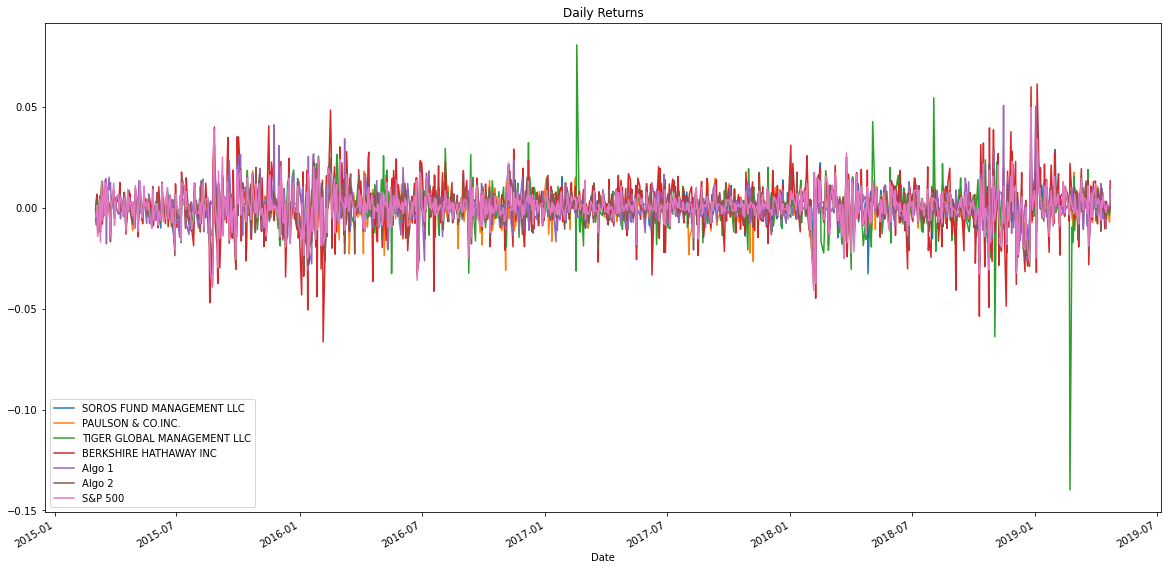

In [23]:
# Plot daily returns
plt.figure()

# Plot daily returns
combined.plot(figsize=(20,10), title = "Daily Returns");

<Figure size 432x288 with 0 Axes>

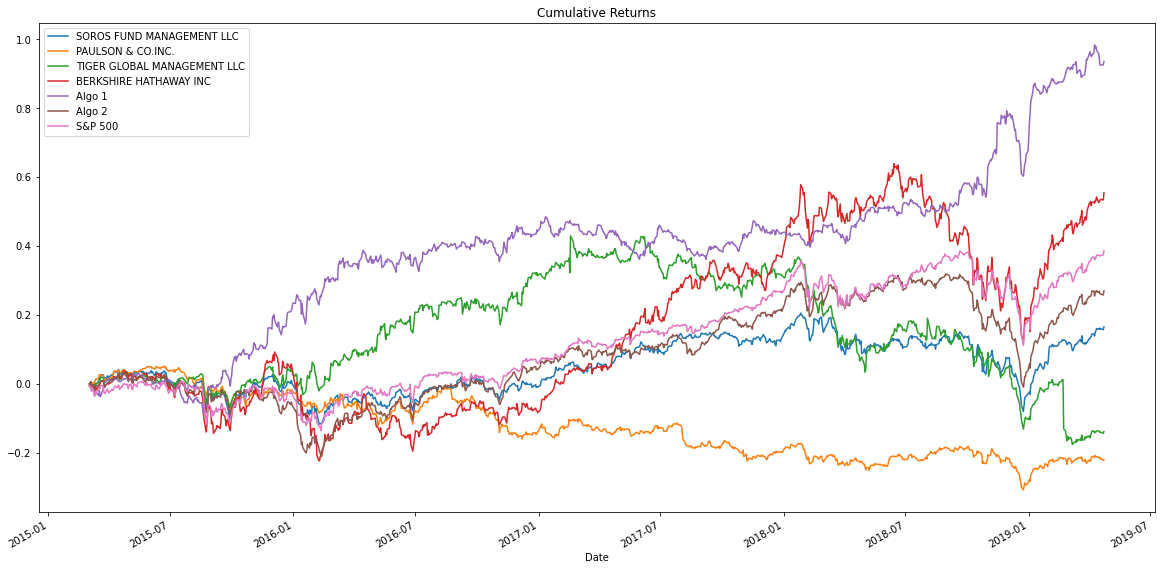

In [24]:
# Initialize new figure
plt.figure()

# Create cumulative return function
def CumulativeReturn(daily_returns):
    cumu_return = (1 + daily_returns).cumprod () - 1
    return cumu_return

# apply cumulative return function
cr = combined.apply(CumulativeReturn)

# Plot cumulative returns
cr.plot(figsize=(20,10), title = "Cumulative Returns");

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

<Figure size 432x288 with 0 Axes>

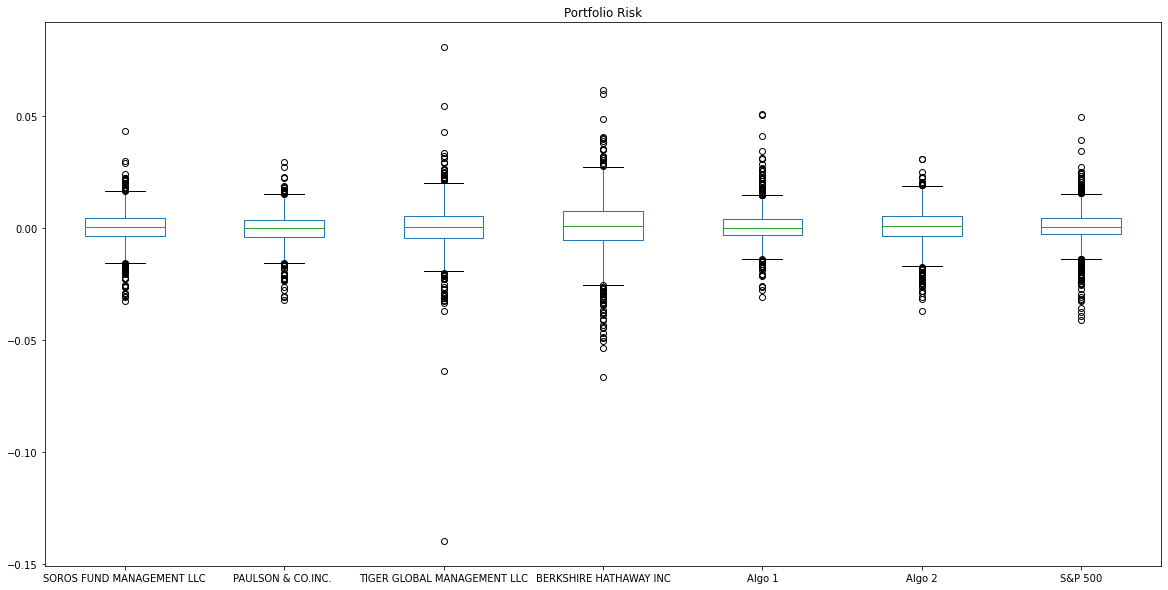

In [25]:
# Initialize new figure
plt.figure();

# Box Plot to visually show risk
combined.plot(kind="box", figsize=(20,10), title = "Portfolio Risk");

In [26]:
# Daily standard deviations
daily_std = combined.std()

# Show results
daily_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

In [27]:
# Assign S&P 500 risk variable
sp_std = combined["S&P 500"].std()

# Determine which portfolios are riskier than the S&P 500
combined.std() > sp_std

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

In [28]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)

# Show results
annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

<Figure size 432x288 with 0 Axes>

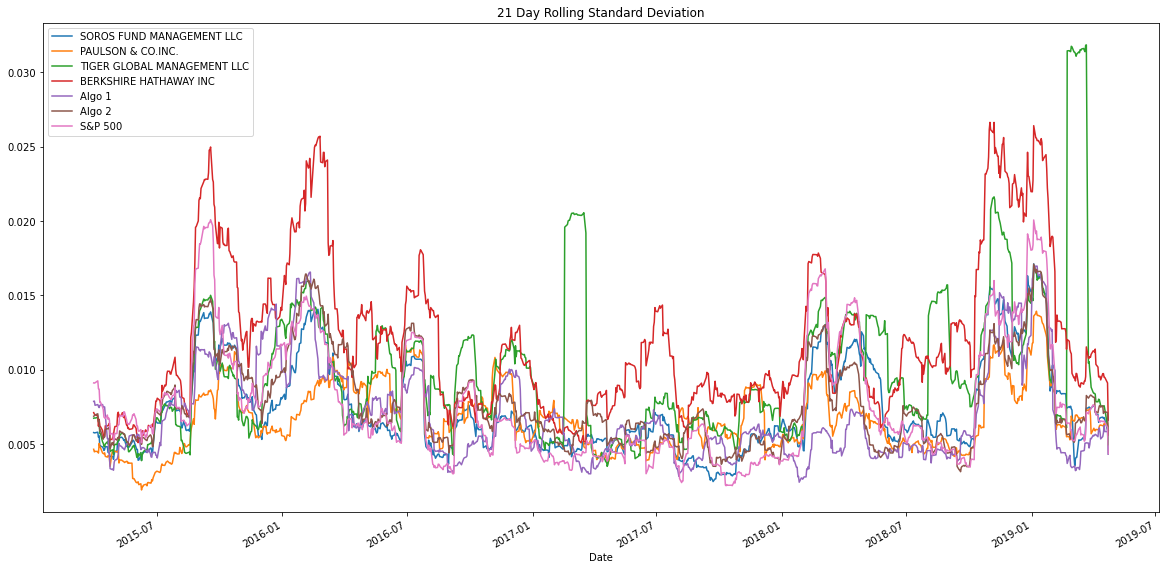

In [29]:
# Initialize new figure
plt.figure()

# Calculate Roling Standard deviation for the S&P 500 and Whale Portfolios
# using a 21 trading day window
rolling_21 = combined.rolling(window=21).std()

# Plot results
rolling_21.plot(figsize=(20,10), title = "21 Day Rolling Standard Deviation");



In [31]:
# Construct a correlation table
correlation = combined.corr()

# Show results
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


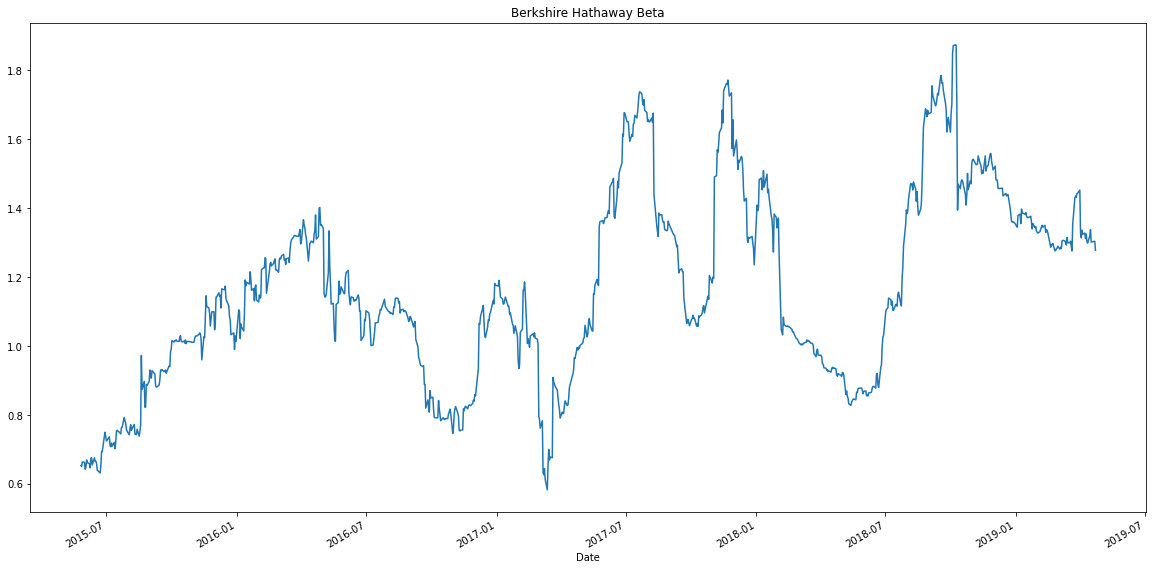

In [32]:
# Initialize new figure
plt.figure()

# Calculate covariance
bh_covariance = combined['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined['S&P 500'])

# Calculate variance
variance = combined['S&P 500'].rolling(window=60).var()

# Calculate beta
bh_beta = (bh_covariance / variance)

# Plot results
bh_beta.plot(figsize=(20,10), title="Berkshire Hathaway Beta");

<Figure size 432x288 with 0 Axes>

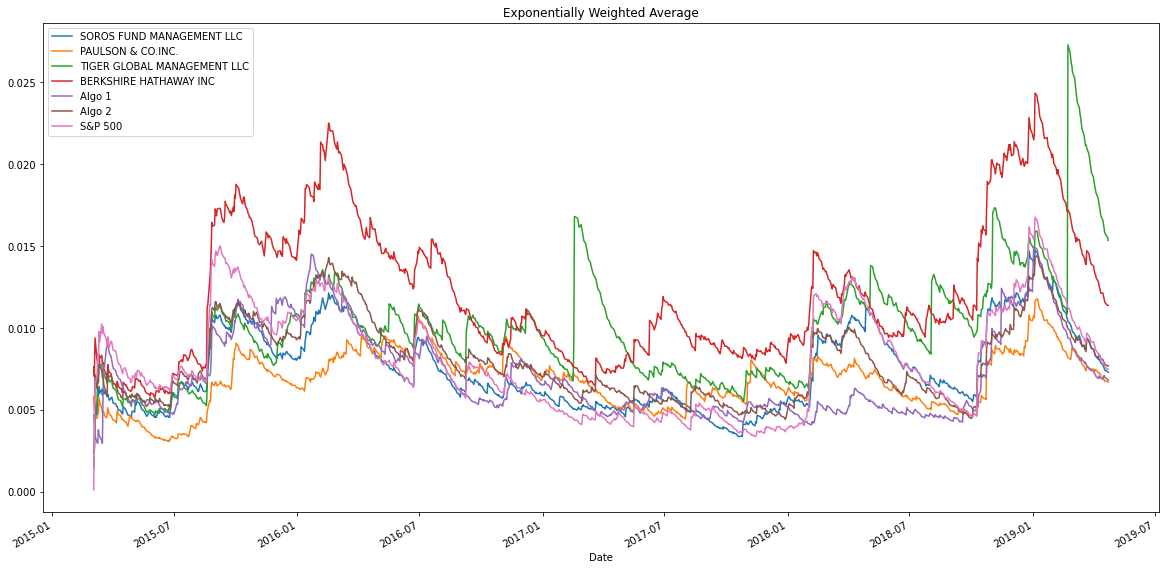

In [34]:
# Initialize new figure
plt.figure()

# Calculate rolling window using the exponentially weighted moving average
ewma = combined.ewm(halflife=21).std()

# Plot results
ewma.plot(figsize=(20,10), title="Exponentially Weighted Average");

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [35]:
# Calculate annualized Sharpe Ratios
sharpe_ratios = (combined.mean()*252) / (combined.std()*np.sqrt(252))

# Show results
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

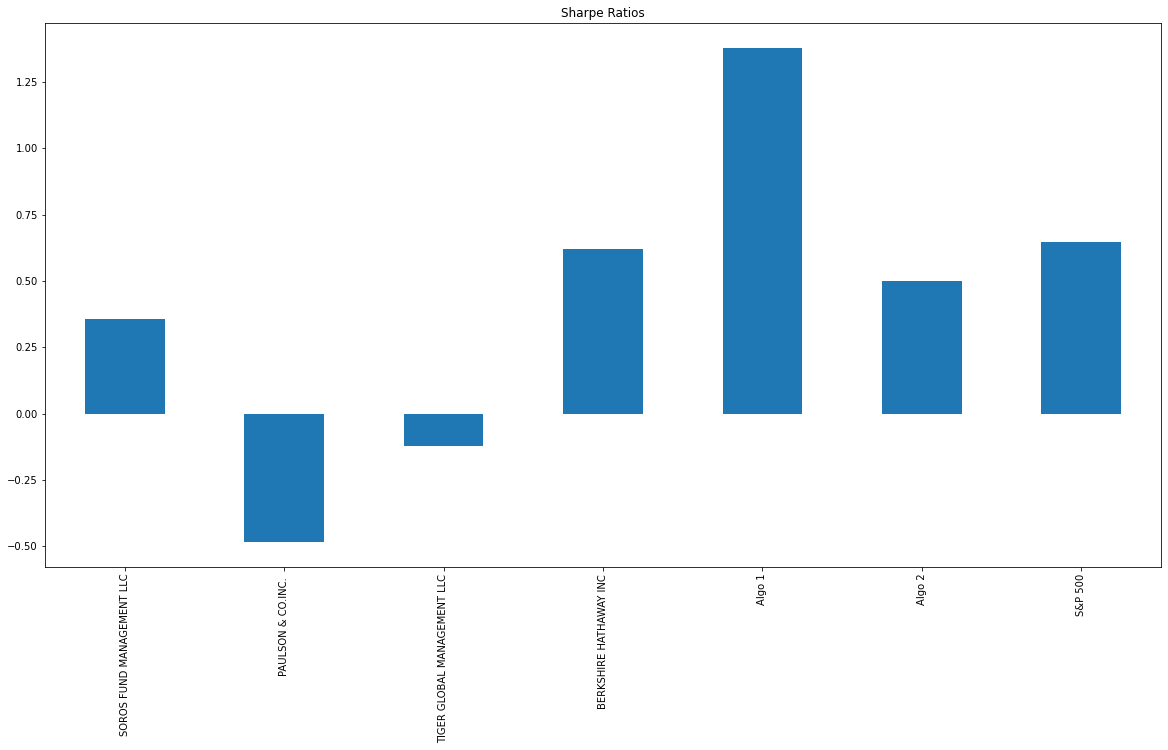

In [36]:
# Initialize new figure
plt.figure()

# Visualize Sharpe Ratios as a bar plot
sharpe_ratios.plot(kind="bar", figsize= (20,10), title="Sharpe Ratios");

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [37]:
# designate start date
startdate = '2015-11-06'

In [58]:
# Read first stock
AMD = pdr.DataReader('AMD', 'yahoo',startdate)

In [61]:
# Read the second stock
SNAP = pdr.DataReader('SNAP','yahoo',startdate)

In [64]:
# Read the third stock
MJ = pdr.DataReader('MJ','yahoo',startdate)

In [41]:
# Read fourth stock
SQ = pdr.DataReader('SQ', 'yahoo',startdate)

In [65]:
# Concatenate all stocks into a single DataFrame
portfolio = pd.concat([AMD['Adj Close'], SNAP['Adj Close'], MJ['Adj Close'], SQ['Adj Close']], axis='columns', join='inner')

# Reset index
portfolio.columns = ['AMD', 'SNAP', 'MJ', 'SQ']

# Show portfolio
portfolio

,AMD,SNAP,MJ,SQ
Date,,,,
2017-03-02,13.900000,24.480000,24.518684,16.990000
2017-03-03,13.030000,27.090000,24.387787,16.889999
2017-03-06,13.040000,23.770000,24.369343,16.860001
2017-03-07,13.050000,21.440001,24.670666,16.760000
2017-03-08,13.220000,22.809999,24.518684,16.830000
...,...,...,...,...
2020-12-02,93.739998,47.490002,15.580000,202.000000
2020-12-03,92.309998,47.950001,15.830000,205.529999
2020-12-04,94.040001,48.099998,15.780000,208.149994


In [66]:
# Reset the index
daily_returns = portfolio.pct_change()

# Drop nulls
daily_returns = daily_returns.dropna().copy()

# Show results
daily_returns

,AMD,SNAP,MJ,SQ
Date,,,,
2017-03-03,-0.062590,0.106618,-0.005339,-0.005886
2017-03-06,0.000767,-0.122554,-0.000756,-0.001776
2017-03-07,0.000767,-0.098023,0.012365,-0.005931
2017-03-08,0.013027,0.063899,-0.006160,0.004177
2017-03-09,0.008321,-0.004384,-0.029631,0.014260
...,...,...,...,...
2020-12-02,0.011983,0.067191,0.038667,-0.004926
2020-12-03,-0.015255,0.009686,0.016046,0.017475
2020-12-04,0.018741,0.003128,-0.003159,0.012748


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [67]:
# Pivot so that each column of prices represents a unique symbol
weights = np.full((1,len(portfolio.columns)),1/len(portfolio.columns))[0]

# Calculate weighted portfolio returns
portfolio_returns = daily_returns.dot(weights)

# Show results
portfolio_returns

Date
2017-03-03    0.008201
2017-03-06   -0.031080
2017-03-07   -0.022706
2017-03-08    0.018736
2017-03-09   -0.002859
                ...   
2020-12-02    0.028229
2020-12-03    0.006988
2020-12-04    0.007865
2020-12-07    0.007981
2020-12-08    0.002811
Length: 950, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [68]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
combined['Custom'] = portfolio_returns

# drop NANs
combined = combined.dropna().copy()

# Show results
combined

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2017-03-03,0.001050,0.000191,0.002118,0.001445,-0.003131,0.000827,0.000504,0.008201
2017-03-06,-0.003016,-0.010073,-0.004702,-0.006102,-0.001548,-0.005750,-0.003277,-0.031080
2017-03-07,-0.005288,-0.007044,-0.004209,0.000338,-0.001838,-0.007664,-0.002913,-0.022706
2017-03-08,-0.004496,-0.001563,0.000866,0.002992,-0.003141,-0.004234,-0.002284,0.018736
2017-03-09,0.000069,-0.001656,0.003661,-0.001979,-0.000414,-0.002858,0.000800,-0.002859
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000858
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,-0.005505
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,-0.008455


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [69]:
# Risk
risk = combined.std() * np.sqrt(252)

# Show sorted results
risk.sort_values(ascending=False)

Custom                         4.488629
BERKSHIRE HATHAWAY INC         0.203729
TIGER GLOBAL MANAGEMENT LLC    0.184379
S&P 500                        0.132723
SOROS FUND MANAGEMENT LLC      0.127504
Algo 2                         0.122114
PAULSON & CO.INC.              0.107852
Algo 1                         0.107619
dtype: float64

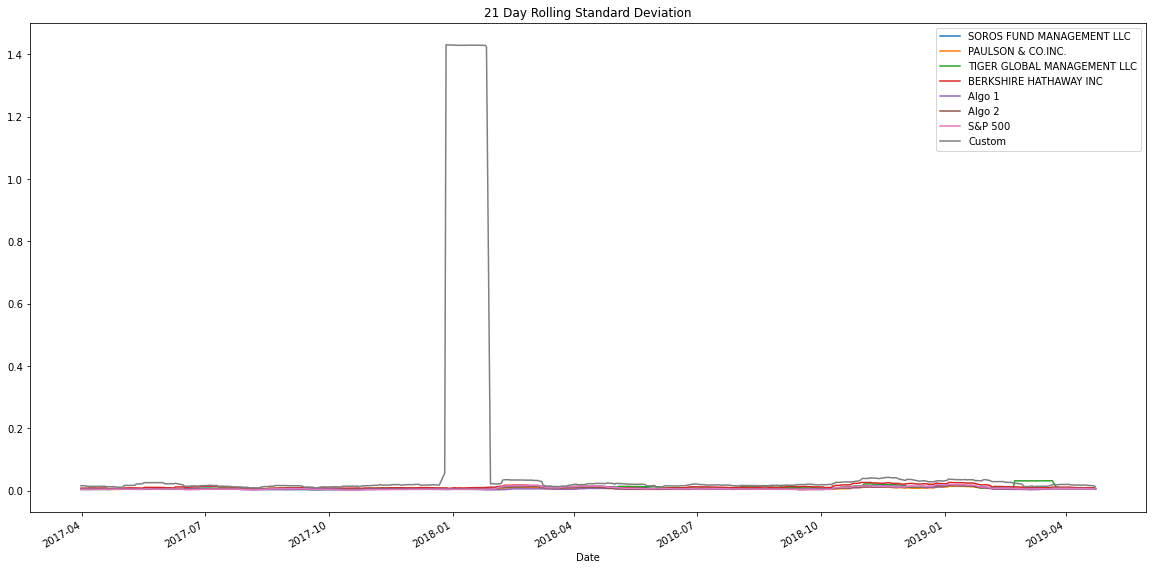

In [70]:
# Initialize new figure
plt.figure

# Rolling
rolling_std_dev = combined.rolling(window=21).std()

# Plot results
rolling_std_dev.plot(figsize=(20,10), title='21 Day Rolling Standard Deviation');

In [73]:
# Annualized Sharpe Ratios
custom_sharpe_ratios = (combined.mean() * 252)/(combined.std() * np.sqrt(252))

# Show sorted results
custom_sharpe_ratios.sort_values(ascending=False)

Algo 1                         1.315897
BERKSHIRE HATHAWAY INC         1.024126
S&P 500                        0.801867
Custom                         0.733410
Algo 2                         0.614245
SOROS FUND MANAGEMENT LLC      0.468444
PAULSON & CO.INC.             -0.546754
TIGER GLOBAL MANAGEMENT LLC   -1.101343
dtype: float64

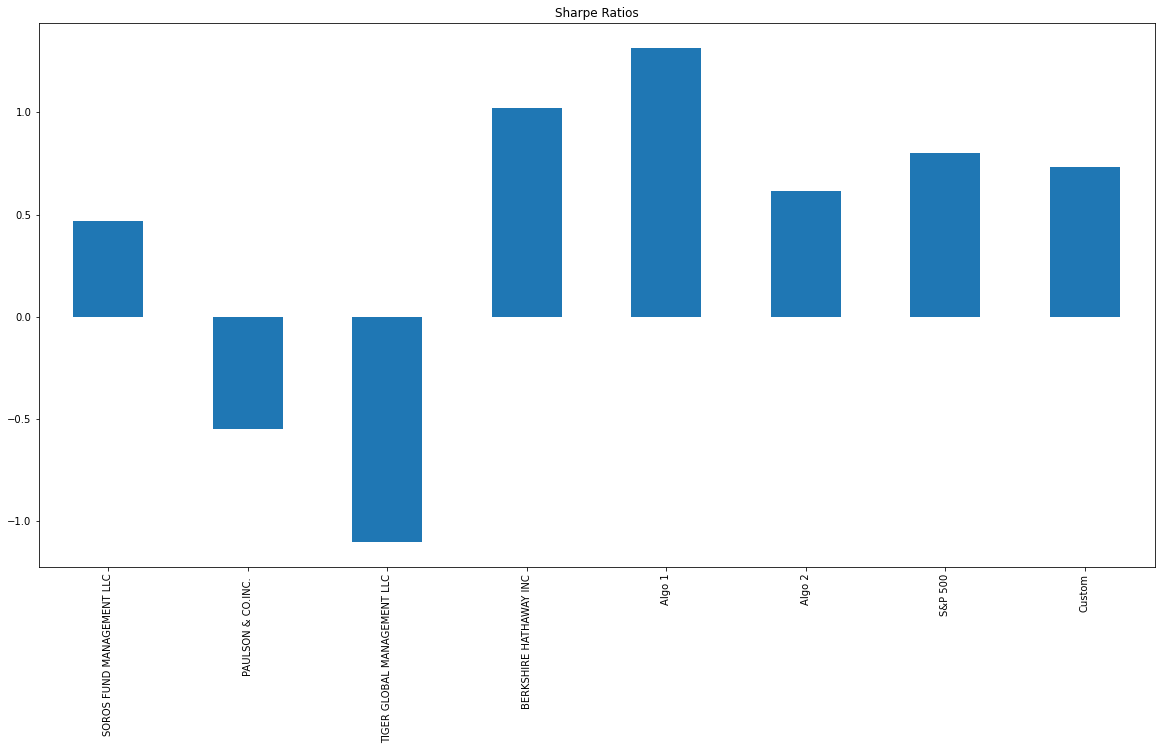

In [74]:
# Initialize new figure
plt.figure()

# Sort results
custom_sharpe_ratios.sort_values(ascending=False)

# Visualize Sharpe ratios as bar plot
custom_sharpe_ratios.plot(figsize=(20,10), kind='bar',title='Sharpe Ratios')

In [75]:
# Create a correlation analysis
custom_corr = combined.corr()

# Show results
custom_corr

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.711573,0.505095,0.765245,0.282117,0.805158,0.819698,0.027252
PAULSON & CO.INC.,0.711573,1.000000,0.457384,0.585231,0.291124,0.734428,0.712397,0.033335
TIGER GLOBAL MANAGEMENT LLC,0.505095,0.457384,1.000000,0.373152,0.108389,0.459006,0.553126,0.017589
BERKSHIRE HATHAWAY INC,0.765245,0.585231,0.373152,1.000000,0.249263,0.746538,0.805741,0.048616
Algo 1,0.282117,0.291124,0.108389,0.249263,1.000000,0.287738,0.247927,0.022378
Algo 2,0.805158,0.734428,0.459006,0.746538,0.287738,1.000000,0.866984,0.042304
S&P 500,0.819698,0.712397,0.553126,0.805741,0.247927,0.866984,1.000000,0.048355
Custom,0.027252,0.033335,0.017589,0.048616,0.022378,0.042304,0.048355,1.000000


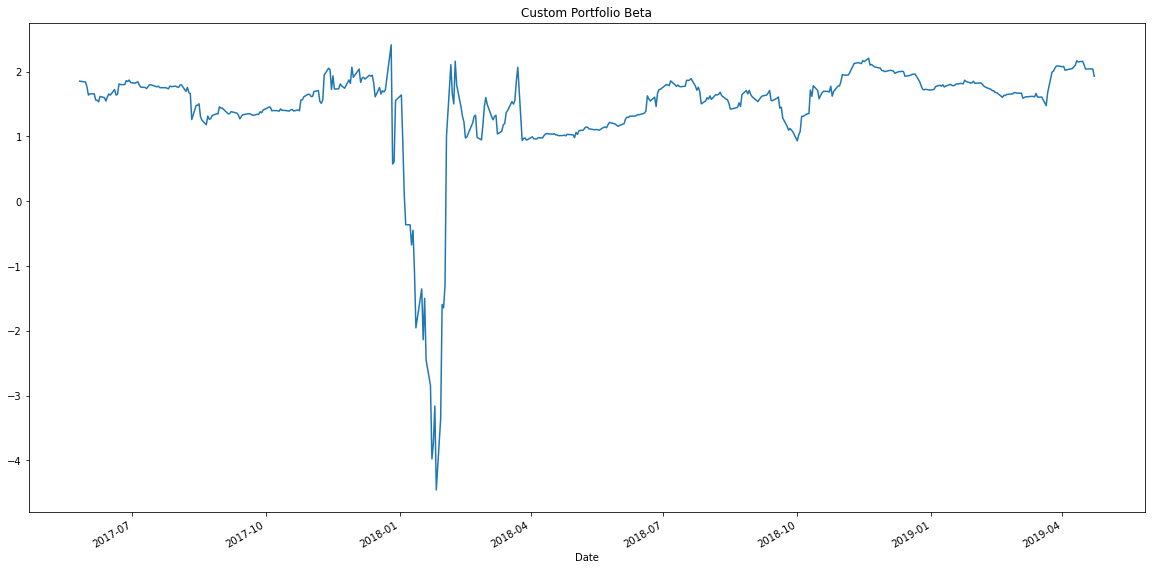

In [76]:
# Initialize new figure
plt.figure()

# Calculate covariance
custom_covariance = combined['Custom'].rolling(window=60).cov(combined['S&P 500'])

# Calculate variance
variance = combined['S&P 500'].rolling(window=60).var()

# beta
custom_beta=custom_covariance/variance

# plot results
custom_beta.plot(figsize=(20,10),title='Custom Portfolio Beta');